In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy.optimize import curve_fit
from pathlib import Path
from sklearn.preprocessing import scale, StandardScaler

In [2]:
# Assigning directories
Filepath = Path.cwd() / "DataSolution"
Figpath = Path.cwd() / "Graphiques"

# Setting default plot parameters
plt.style.use("https://raw.githubusercontent.com/MATOT9/Python-templates/master/MplStyles/LabRepport.mplstyle")

In [3]:
def getPCA(data):
    df_st =  StandardScaler().fit_transform(data)
    pd.DataFrame(df_st, columns=df.columns)
    pca_out = PCA().fit(df_st)
    pca_out.explained_variance_ratio_
    #pd.DataFrame(df_st, columns=df.columns)
    #loadings = np.array(pca.components_.T) * np.sqrt(pca.explained_variance_)
    #loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'])

def straightLine(X, m, b):
    return m*X + b

def curvefit(dataX, dataY, function):
        popt, pcov = curve_fit(function, dataX, dataY)
        nbPoint = len(dataX)
        newDataX = np.linspace(dataX[0], dataX[-1], nbPoint)
        newDataY = function(newDataX, *popt)
        perr = np.sqrt(np.diag(pcov))
        deltaValues = []
        for i in range(len(perr)):
            deltaValues.append(perr[i])
        return newDataX, newDataY, deltaValues, popt

def getCoefficientsWithPCA(data):
    pca = PCA(n_components=1)
    principalCoefficients = pca.fit_transform(data)
    principalComponents = np.array(pca.components_.T)
    inverse = np.linalg.pinv(principalComponents)
    moy = np.array(pca.mean_)
    m = moy@inverse
    coefs = principalCoefficients + m
    explainedVariance = pca.explained_variance_ratio_
    #print(sum(explainedVariance)) # value=0.9942653114936244
    coefficients = []
    for i in coefs:
        coefficients.append(i[0])
    coefficients = np.array(coefficients)
    return coefficients

In [4]:
λ, _ = np.loadtxt(Filepath/'0%50ms.txt', skiprows=14, delimiter=',', unpack=True)

Counts = []
for i in Path.iterdir(Filepath):
    df = pd.read_csv(i, sep=",", skiprows=14, names=["λ", "Counts"])
    count = df.iloc[:,1][40:81]
    #count = count.to_numpy(dtype=float, copy=False)
    #_ , Count = np.loadtxt(i, skiprows=14, delimiter=",", unpack=True)
    #count = pd.DataFrame(count).T
    Counts.append(count)

#print(Counts[0])
scaler = StandardScaler()
df = pd.DataFrame(Counts)

np. set_printoptions(suppress=True)
ScaledCount=Counts.copy()
df_st = scaler.fit_transform(ScaledCount)
ScaledCount=pd.DataFrame(scaler.fit_transform(ScaledCount), columns=df.columns)
ScaledCount.head()

,40,41,42,43,44,45,46,47,48,49,...,71,72,73,74,75,76,77,78,79,80
0,-1.035013,-1.291529,-1.355243,-1.332861,-1.326044,-1.413405,-1.363048,-1.396762,-1.371281,-1.391746,...,-1.517475,-1.439808,-1.474338,-1.226075,-1.193632,-1.198409,-1.673815,-0.752147,-1.045013,-0.917581
1,-1.846317,-1.143668,-0.976311,-0.835360,-0.707347,-0.553525,-0.516522,-0.465476,-0.475608,-0.473774,...,0.000650,-0.086600,-0.345118,-1.518932,-1.371583,-1.697546,-1.057174,-1.478485,-1.595637,-1.654605
2,0.675886,0.935038,0.965675,1.002144,1.051639,1.059676,1.046090,1.016863,1.042809,1.046898,...,0.936984,0.906295,0.836513,1.017459,-0.482862,-0.199555,-0.087872,-0.025809,0.056233,-0.706828
3,-0.215716,-0.520969,-0.577082,-0.637852,-0.671180,-0.700592,-0.710868,-0.672557,-0.700881,-0.695283,...,-0.699340,-0.701694,-0.555223,-0.251020,1.295614,0.399525,0.087945,1.063434,0.134959,0.872595
4,0.981095,1.598091,1.622033,1.654646,1.645588,1.601418,1.646090,1.680226,1.640647,1.632088,...,1.664242,1.758633,1.834475,1.114511,-0.126960,0.798718,0.440605,-0.843005,-0.101219,0.661842


In [5]:
pca = PCA(n_components=1)
principalCoefficients = pca.fit_transform(df_st)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
#loadings_df

In [6]:
pca = PCA(n_components=1)
principalCoefficients = pca.fit_transform(df)
Components = pca.inverse_transform(principalCoefficients)
Components = pd.DataFrame(Components).T
#Components.shape
Components

,0,1,2,3,4,5,6
0,28958.903897,29118.529115,29290.836390,29061.527564,29374.573357,29067.661962,29212.077715
1,29588.650691,30008.625200,30461.966247,29858.653920,30682.278503,29874.793544,30254.751895
2,30519.016118,31091.457090,31709.377901,30887.040623,32009.671749,30909.039534,31426.936985
3,31695.287598,32487.661056,33342.987762,32204.707546,33758.654856,32235.158463,32952.032718
4,32940.687150,33995.873392,35134.893085,33619.070448,35688.427778,33659.621263,34614.266883
5,33884.013139,35235.089019,36693.506475,34752.625025,37402.260382,34804.546881,36026.889079
6,34772.649732,36330.980803,38013.119659,35774.506778,38830.596495,35834.393453,37244.243080
7,35802.529014,37543.653512,39423.108542,36921.904658,40336.476036,36988.816085,38564.042152
8,36741.041401,38620.995890,40650.310811,37949.671382,41636.506413,38021.918046,39722.746057
9,37854.097908,39830.697323,41964.335508,39124.861283,43001.229571,39200.822013,40989.086394


In [7]:
Components.to_numpy(dtype=float, copy=False)

array([[28958.90389688, 29118.52911465, 29290.8363901 , 29061.52756406,
        29374.57335747, 29067.66196233, 29212.07771452],
       [29588.65069124, 30008.62520007, 30461.96624726, 29858.65392018,
        30682.27850262, 29874.79354359, 30254.75189504],
       [30519.01611826, 31091.45708952, 31709.37790114, 30887.04062301,
        32009.67174943, 30909.03953366, 31426.93698498],
       [31695.28759817, 32487.66105631, 33342.98776237, 32204.70754564,
        33758.6548564 , 32235.15846335, 32952.03271776],
       [32940.68714982, 33995.87339225, 35134.89308522, 33619.07044833,
        35688.42777842, 33659.62126324, 34614.26688272],
       [33884.01313894, 35235.08901931, 36693.50647451, 34752.62502508,
        37402.26038244, 34804.54688091, 36026.88907882],
       [34772.64973192, 36330.98080311, 38013.1196587 , 35774.50677833,
        38830.5964952 , 35834.39345263, 37244.24308011],
       [35802.52901415, 37543.65351182, 39423.10854167, 36921.90465833,
        40336.47603631, 3

ValueError: x and y must be the same size

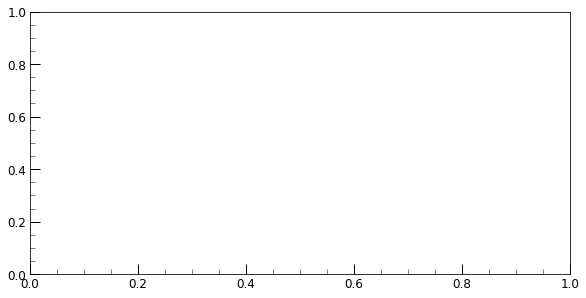

In [8]:
concentration = np.array([0, 2.5, 7.5, 10, 15, 20])
plt.scatter(Components, concentration, alpha=0.2)
#plt.scatter(Components[:, 0], Components[:, 1], alpha=0.8)
dataX, dataY, deltaValues, popt = curvefit(Components, concentration, straightLine)

In [ ]:
pca = PCA(n_components=3)
principalCoefficients = pca.fit_transform(df_st)
principalCoefficients

array([[-8.72002052,  1.61353181,  1.10763287],
       [-2.60312683,  4.14869574, -1.04485107],
       [ 5.69624244,  1.01170786,  0.69952326],
       [-3.75263559, -1.9785161 , -0.60460859],
       [ 9.61875731,  0.73500215,  0.04235254],
       [-3.02713349, -3.44460921, -0.1436811 ],
       [ 2.78791667, -2.08581224, -0.05636791]])

In [ ]:
concentration = np.array([0, 2.5, 7.5, 10, 15, 20])
dataX, dataY, deltaValues, popt = curvefit(coefficients, concentration, straightLine)